# Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Data Collection & Processing

### Reading the csv file

In [2]:
titanic_data=pd.read_csv("C:\\Users\\pinku\\Desktop\\mini project\\train.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Checking the no. of rows and columns in the dataset

In [3]:
titanic_data.shape

(891, 12)

### Fetching some informations about the data

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking the no. of missing values in each column

In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling the missing values

### Handling to the Age Column

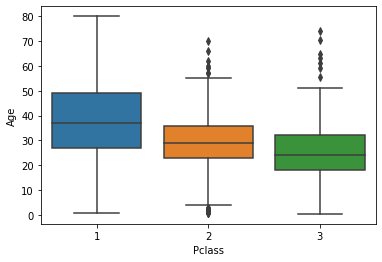

In [6]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

#### The above plot shows that the average  age of people in Class 1,2,3 were 37,29,24 respectively

In [7]:
def age_approx(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [8]:
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(age_approx,axis=1)

In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Heading to the Embarked Column

#### Finding the mode value of this column and replacing the missing values with it

In [10]:
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [11]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

##### So all the missing values has been replaced

### Dropping colums that are not required

In [13]:
titanic_data.drop(columns={'PassengerId','Fare','Cabin','Name','Ticket'},axis=1,inplace=True)

## Data Analysis

### Statistical measures about the data

In [14]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,0.523008,0.381594
std,0.486592,0.836071,13.244532,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000
75%,1.000000,3.000000,37.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


 ### Count for the no. of people survived and not survived

In [15]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Data Visualization

### Count plot for "Survived" Column

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Nitin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


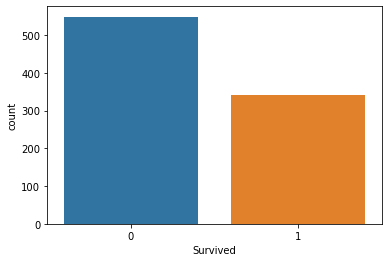

In [16]:
print(sns.countplot("Survived",data=titanic_data))

### Count plot for "Sex" Column

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Nitin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


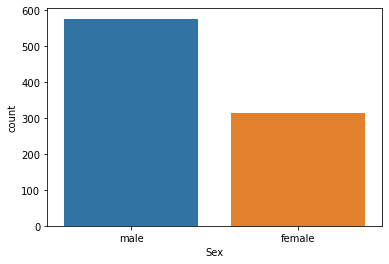

In [17]:
print(sns.countplot("Sex",data=titanic_data))

#### No. of surviovrs gender-wise

C:\Users\Nitin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


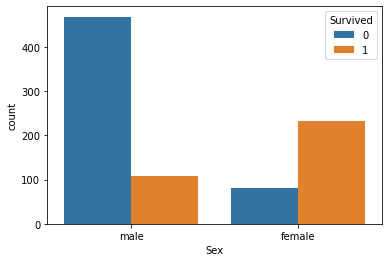

In [18]:
sns.countplot('Sex',hue='Survived',data=titanic_data)

### From the above graph more female survived as compared to male

#### count plot for "PClass" Column

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Nitin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


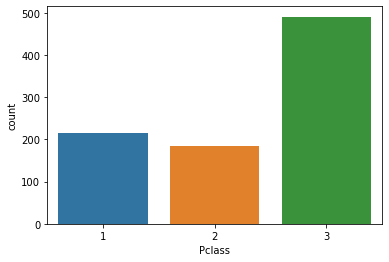

In [19]:
print(sns.countplot("Pclass",data=titanic_data))

#### No. of surviovrs pclass-wise

C:\Users\Nitin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


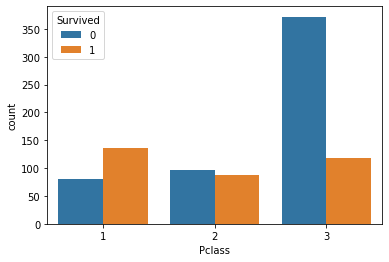

In [20]:
sns.countplot('Pclass',hue='Survived',data=titanic_data)

#### count plot for "Embarked" Column

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Nitin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


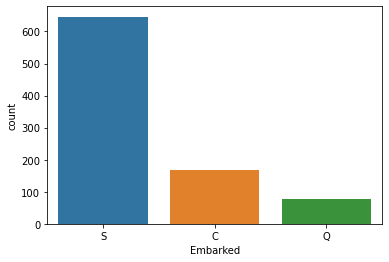

In [21]:
print(sns.countplot("Embarked",data=titanic_data))

#### No. of surviovrs embarked-wise

C:\Users\Nitin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


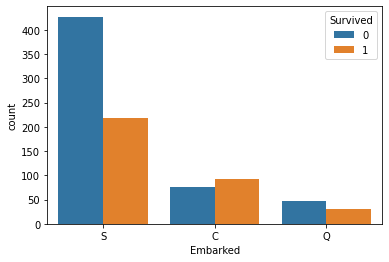

In [22]:
sns.countplot('Embarked',hue='Survived',data=titanic_data)


# Training part 

### Encoding the Categorical Columns

In [23]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### Converting categorical columns

In [25]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [26]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [27]:
titanic_data.drop(['Sex','Embarked'],axis=1,inplace=True)

titanic_data=pd.concat([titanic_data,sex,embark],axis=1)


In [28]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [29]:
titanic_data

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,1,0,1
887,1,1,19.0,0,0,0,0,1
888,0,3,24.0,1,2,0,0,1
889,1,1,26.0,0,0,1,0,0


## Survival of the passengers of different age groups

In [30]:
df20=titanic_data.loc[titanic_data.Age<=20.0]

passengerCount20=df20.Age.count()
maleCount20=df20[df20['male']==1].male.count()
femaleCount20=df20[df20['male']==0].male.count()
maleSurvived20=(df20[(df20['male']==1) & (df20['Survived']==1)]).Survived.count()
femaleSurvived20=(df20[(df20['male']==0) & (df20['Survived']==1)]).Survived.count()
msp20=round((maleSurvived20/maleCount20)*100,2)
fsp20=round((femaleSurvived20/femaleCount20)*100,2)
totalsurvived20=df20[df20['Survived']==1].Survived.count()
tsp20=round((totalsurvived20/passengerCount20)*100,2)

In [31]:
df40=titanic_data[(titanic_data['Age']>=20) & (titanic_data['Age']<=40)]
passengerCount40=df40.Age.count()
maleCount40=df40[df40['male']==1].male.count()
femaleCount40=df40[df40['male']==0].male.count()
maleSurvived40=(df40[(df40['male']==1) & (df40['Survived']==1)]).Survived.count()
femaleSurvived40=(df40[(df40['male']==0) & (df40['Survived']==1)]).Survived.count()
msp40=round((maleSurvived40/maleCount40)*100,2)
fsp40=round((femaleSurvived40/femaleCount40)*100,2)
totalsurvived40=df40[df40['Survived']==1].Survived.count()
tsp40=round((totalsurvived40/passengerCount40)*100,2)

In [32]:
df60=titanic_data.loc[(titanic_data['Age']>=40) & (titanic_data['Age']<=60)]
passengerCount60=df60.Age.count()
maleCount60=df60[df60['male']==1].male.count()
femaleCount60=df60[df60['male']==0].male.count()
maleSurvived60=(df60[(df60['male']==1) & (df60['Survived']==1)]).Survived.count()
femaleSurvived60=(df60[(df60['male']==0) & (df60['Survived']==1)]).Survived.count()
msp60=round((maleSurvived60/maleCount60)*100,2)
fsp60=round((femaleSurvived60/femaleCount60)*100,2)
totalsurvived60=df60[df60['Survived']==1].Survived.count()
tsp60=round((totalsurvived60/passengerCount60)*100,2)

In [33]:
df100=titanic_data[titanic_data['Age']>60]
passengerCount100=df100.Age.count()
maleCount100=df100[df100['male']==1].male.count()
femaleCount100=df100[df100['male']==0].male.count()
maleSurvived100=(df100[(df100['male']==1) & (df100['Survived']==1)]).Survived.count()
femaleSurvived100=(df100[(df100['male']==0) & (df100['Survived']==1)]).Survived.count()
msp100=round((maleSurvived100/maleCount100)*100,2)
fsp100=round((femaleSurvived100/femaleCount100)*100,2)
totalsurvived100=df100[df100['Survived']==1].Survived.count()
tsp100=round((totalsurvived100/passengerCount100)*100,2)

In [34]:
data = pd.DataFrame({
     'Age Group':['0-20', '20-40','40-60','>60' ],
    
    'Total Count': [ 
                     passengerCount20,
                     passengerCount40,
                     passengerCount60,
                     passengerCount100
    ],
    'Total Survived':[
                    totalsurvived20,
                    totalsurvived40,
                    totalsurvived60,
                    totalsurvived100
                      
    ],
    
    'Male Count': [
                    maleCount20,
                    maleCount40,
                    maleCount60,
                    maleCount100],
    
    'Female Count': [
                    femaleCount20,
                    femaleCount40,
                    femaleCount60,
                    femaleCount100],
    
    'Male Survived Count': [
                    maleSurvived20,
                    maleSurvived40,
                    maleSurvived60,
                    maleSurvived100],
    
    'Female Survived Count': [
                    femaleSurvived20,
                    femaleSurvived40,
                    femaleSurvived60,
                    femaleSurvived100],
    'Total Survived(%)':[
                    tsp20,
                    tsp40,
                    tsp60,
                    tsp100
    ],
    'Male Survived(%)': [
                    msp20,
                    msp40,
                    msp60,
                    msp100],
    'Female Survived(%)': [
                     fsp20,
                     fsp40,
                     fsp60,
                     fsp100]
    
        
    })
data

,Age Group,Total Count,Total Survived,Male Count,Female Count,Male Survived Count,Female Survived Count,Total Survived(%),Male Survived(%),Female Survived(%)
0,0-20,179,82,102,77,29,53,45.81,28.43,68.83
1,20-40,577,208,386,191,65,143,36.05,16.84,74.87
2,40-60,141,56,90,51,17,39,39.72,18.89,76.47
3,>60,22,5,19,3,2,3,22.73,10.53,100.00


In [35]:
MS=maleSurvived20 + maleSurvived40 + maleSurvived60 + maleSurvived100
MT=maleCount20 + maleCount40 + maleCount60 + maleCount100
MSP=round((MS/MT)*100,2)
FS=femaleSurvived20 + femaleSurvived40 + femaleSurvived60 + femaleSurvived100
FT=femaleCount20 + femaleCount40 + femaleCount60 + femaleCount100
FSP=round((FS/FT)*100,2)

In [36]:
data = pd.DataFrame({
    'Label':['Male Total','Male Survived','Male Survived % ','Female Total','Female Survived','Female Survived %'],
    'Values':[MT,MS,MSP,FT,FS,FSP]
})
data

,Label,Values
0,Male Total,597.00
1,Male Survived,113.00
2,Male Survived %,18.93
3,Female Total,322.00
4,Female Survived,238.00
5,Female Survived %,73.91


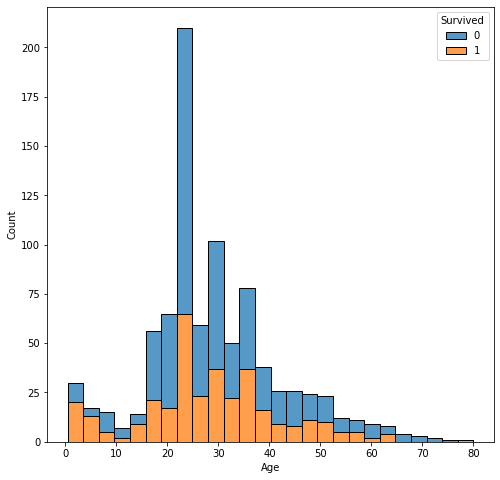

In [37]:
plt.figure(figsize=(8,8))
sns.histplot(x='Age',data=titanic_data,hue='Survived',multiple='stack')
plt.show()

### Conclusion- The above histogram shows how survival will be affected by age. We can see that as age increases, survival of people is going down. So we can say that Age and Survival are negatively correlated as shown by our correlation heatmap.

## HeatMap

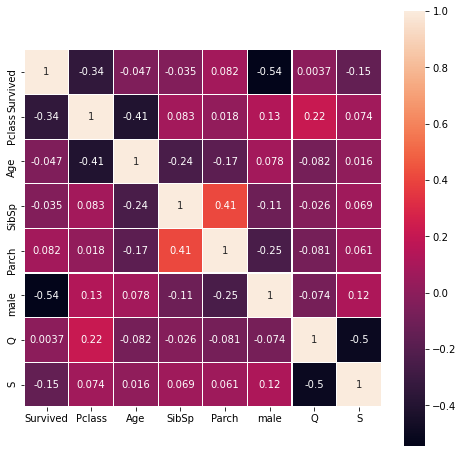

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(titanic_data.corr(),annot=True,linewidth=0.1,square=True,)
plt.show()

## Explanation of the significance of the correlation coefficients between two features corresponding to each block given by the heatmap

Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables.
Positive correlation is a relationship between two variables in which both variables move in the same direction.
This is when one variable increases while the other increases and visa versa.
For example, positive correlation may be that the more you exercise, the more calories you will burn.
Whilst negative correlation is a relationship where one variable increases as the other decreases, and vice versa.
### The correlation coefficient doesnot hold any other significance other than to show how strong or weak the relationship is between two features i.e. if  one feature increases or decreases how fast or how slow the other feature increases or decreases compared to the first feature

## PLots

### Pclass & Survived

C:\Users\Nitin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


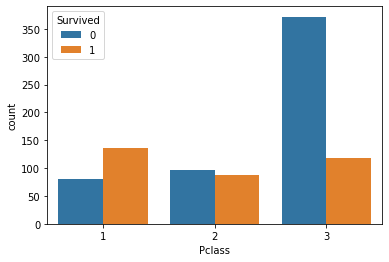

In [39]:
sns.countplot('Pclass',hue='Survived',data=titanic_data)

### Conclusion-  
### 1)As Pclass increases,  survivality goes down which signifies the negative correlation between Pclass & Survival

### Pclass & Age

<Figure size 864x864 with 0 Axes>

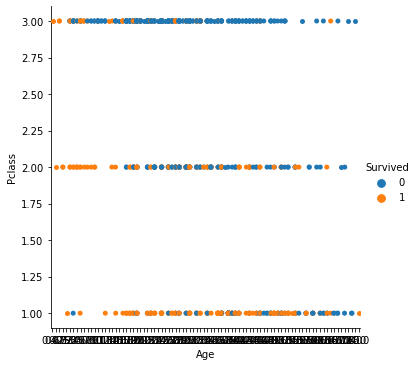

In [40]:
plt.figure(figsize=(12,12))
sns.catplot(x='Age',y='Pclass',hue='Survived',data=titanic_data)
plt.show()

### Conclusion-  
### As Pclass increases, the no. of people in the lower age group increases and the no. of people in the higher age group decreases which shows the negative correlation between the two.


###  Pclass v/s SibSp

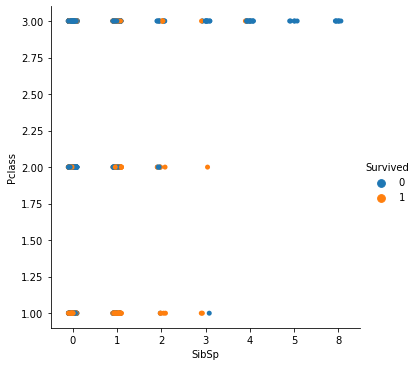

In [41]:
sns.catplot(x='SibSp',y='Pclass',hue='Survived',data=titanic_data)

### Conclusion-  
### 1) A passenger with more siblings/spouse chose a lower passenger class(for Pclass higher the no. lower is the class) i.e. as Pclass increases SibSp value increases which shows the positive correlation
### 2) If a person has more siblings/spouse their survival chances will decreases  which shows the negative correlation 

### Pclass & Parch

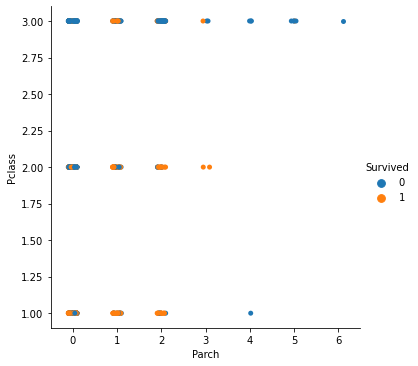

In [42]:
sns.catplot(x='Parch',y='Pclass',hue='Survived',data=titanic_data)

### Conclusion-  
### 1)A passenger with more parents/children chose a lower passenger class(for Pclass higher the no. lower is the class) i.e. as Pclass increases Parch value increases which shows the positive correlation

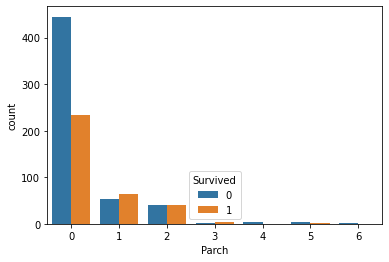

In [43]:
sns.countplot(x='Parch',hue='Survived',data=titanic_data)

### Pclass v/s male

C:\Users\Nitin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


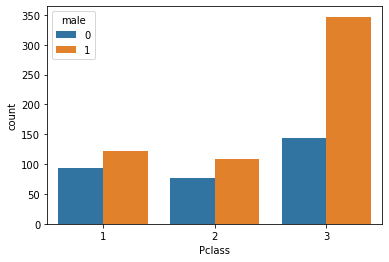

In [46]:
sns.countplot('Pclass',hue='male',data=titanic_data)

### This plot shows the positive correlation between the pclass and male features
### (From the plot both no. of females and no. of males increases as Pclass increases but we can see the no. of males increases much more than the no. of females. Thus it can be said that as Pclass increases the binary value (female=0 male=1) increases from 0 to 1 which shows the positive correlation )

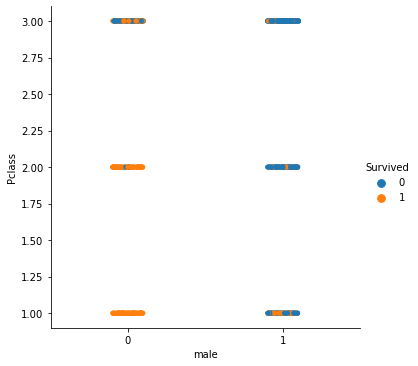

In [47]:
sns.catplot(x='male',y='Pclass',hue='Survived',data=titanic_data)

### Conclusion-
### 1) Although the survival rate of female is high but a female belonging to the lowest passenger class will have higher chance of not surviving.

## Pclass & Q

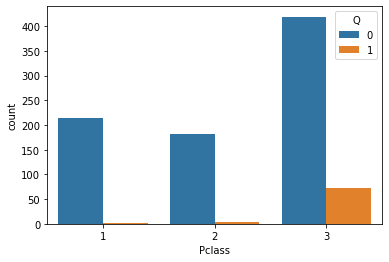

In [48]:
sns.countplot(x='Pclass',hue='Q',data=titanic_data)

## Pclass & S

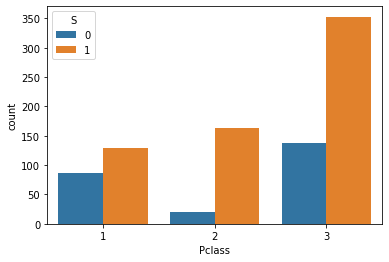

In [49]:
sns.countplot(x='Pclass',hue='S',data=titanic_data)

### Separating the target("Survived") from features("other categories")

In [50]:
X=titanic_data.drop(columns='Survived',axis=1)
Y=titanic_data['Survived']

### Splitting the data into Training data & Test data

#### Data will be splitted in random way

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [52]:
print(X.shape,x_train.shape,x_test.shape)
print(Y.shape,y_train.shape,y_test.shape)

(891, 7) (712, 7) (179, 7)
(891,) (712,) (179,)


#### Now we will train our data

# Model Training

### Logistic Regression Model

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [54]:
y_pred_log = logreg.predict(x_test)

In [55]:
acc_logreg =round(accuracy_score(y_pred_log, y_test) * 100, 2)
print(acc_logreg)

80.45


In [56]:
theta_0=logreg.intercept_ 
theta_s=logreg.coef_.T    

### Confusion matrix for Logistic Regression

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

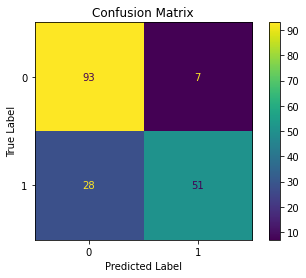

In [58]:
matrix=plot_confusion_matrix(logreg,x_test,y_test)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Gaussian Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred_gaussian = gaussian.predict(x_test)
acc_gaussian = round(accuracy_score(y_pred_gaussian, y_test) * 100, 2)
print(acc_gaussian)


78.77


### Confusion matrix for Gaussian Naive Bayes

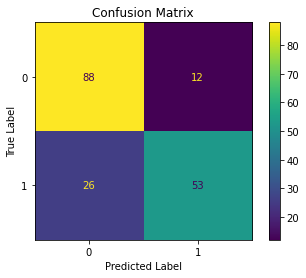

In [60]:
matrix=plot_confusion_matrix(gaussian,x_test,y_test)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Support Vector Machines

In [61]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
acc_svc = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
print(acc_svc)

58.1


### Confusion matrix for Support Vector Machine

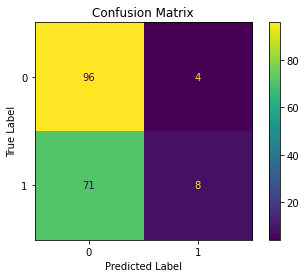

In [62]:
matrix=plot_confusion_matrix(svc,x_test,y_test)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred_dt = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_pred_dt, y_test) * 100, 2)
print(acc_decisiontree)

75.98


### Confusion matrix for Decision Tree

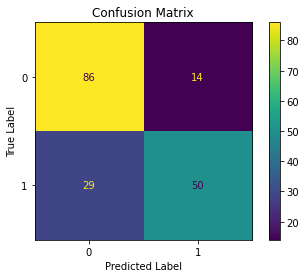

In [64]:
matrix=plot_confusion_matrix(decisiontree,x_test,y_test)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Accuracies of each model

In [65]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Support Vector Machines',
                            'Decision Tree', 'Gaussian Naive Bayes'],
    'Score': [acc_logreg, acc_svc, acc_decisiontree, 
               acc_gaussian,]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,80.45
3,Gaussian Naive Bayes,78.77
2,Decision Tree,75.98
1,Support Vector Machines,58.10


In [72]:
demo = logreg.predict([[1,30.0,0,3,1,1,0]])
demo

array([1], dtype=int64)

### Analysis

In [67]:
pclass=int(input('Enter the PClass: '))
age=int(input('Enter the Age of the Passenger: '))
sibsp=int(input('Enter the no. of Sibling or Spouse: '))
parch=int(input('Enter the no. of Parch: '))

Enter the PClass: 1
Enter the Age of the Passenger: 30
Enter the no. of Sibling or Spouse: 0
Enter the no. of Parch: 3


In [68]:
gender=input('Enter male or female: ')
gender=gender.lower()
if gender=='male':
    sex=1
else:
    sex=0

Enter male or female: male


In [69]:
emb=input('Enter the port of embarkmaent ("C","Q","S"): ')
emb=emb.upper()
if emb=='C':
        Q=0
        S=0
elif emb=='Q':
        Q=1
        S=0
else:
        Q=0
        S=1

Enter the port of embarkmaent ("C","Q","S"): S


In [70]:
demo = logreg.predict([[pclass,age,sibsp,parch,sex,Q,S]])
n=int(demo)
y_pred1=logreg.predict_proba([[pclass,age,sibsp,parch,sex,Q,S]])

for idx,i in enumerate([[item] for sub in y_pred1 for item in sub]):
    if idx==0:
        a=round(i.pop()*100,2)
    else:
        b=round(i.pop()*100,2)

In [71]:
print(f'The chances of the survival of the passenger is : {b}%')

The chances of the survival of the passenger is : 49.32%
